<a href="https://colab.research.google.com/github/LamiaAlobaid/SVM-for-Social-Network-Ads/blob/main/SVM_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SVM ML Model

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# importing Social Network Ads dataset
networkads_data = pd.read_csv('Social_Network_Ads.csv')

# visualizing the dataset content
networkads_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# let's see some features about the dataset
networkads_data.shape # output ==> (number of rows , number of columns)

(400, 5)

In [ ]:
# divide our dataset into X(independent variable) and Y (dependent variable)
# Y is what we want to predict (target)
# X is which we want to predict Y (features)

# we chosses age and EstimatedSalary to see whether the person will purchase a product or not
X = networkads_data.iloc[:, [2,3]]
Y = networkads_data.iloc[:, 4]

In [ ]:
# let's visulaize X and Y
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [ ]:
# let's visulaize X and Y
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

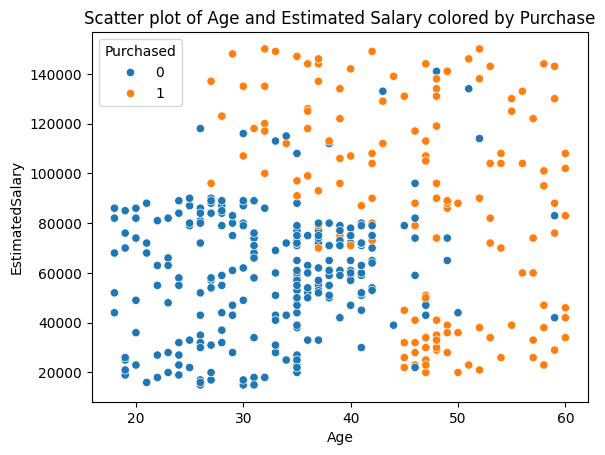

In [ ]:
import seaborn as sns

# Visualization of the data based on our chosen feature
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=networkads_data)
plt.title('Scatter plot of Age and Estimated Salary colored by Purchase')
plt.show()

In [ ]:
# splitting the dataset into train and test dataset (25% for the test)
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


In [ ]:
# let's see our training and testing dataset as numbers of columns and rows
print("Training data:" , X_Train.shape)
print("Testing data:" , X_Test.shape)

Training data: (300, 2)
Testing data: (100, 2)


In [ ]:
# Feature scaling to ensure that all features have a similar scale, preventing bias and improving the performance.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_Train = scaler.fit_transform(X_Train)
X_Test = scaler.transform(X_Test)


In [ ]:
#importing SVC: imports the Support Vector Classification class from the sklearn.svm module
from sklearn.svm import SVC
# create an instance of the SVC class to define your SVM model with desired parameters
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale') # RBF (Radial Basis Function) kernel, C=1.0 is the regularization parameter, and gamma='scale' automatically sets gamma based on the number of features.



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#Train our model svm model
svm_model = SVC(kernel='rbf', C=1, random_state=0)
svm_model.fit(X_Train, Y_Train)

SVC(C=1, random_state=0)

In [ ]:
#test using accuracy score
y_pred = svm_model.predict(X_Test)
accuracy = accuracy_score(Y_Test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.93


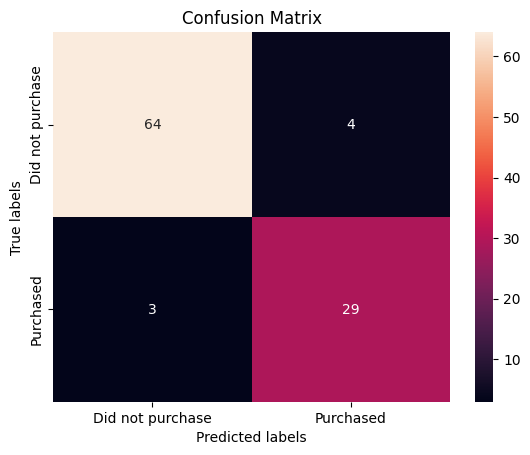

In [ ]:
# prompt: visualize confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(Y_Test, y_pred)

# Create a heatmap
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)  # Annotate cells with values

# Set labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Set tick labels for x and y axes
ax.xaxis.set_ticklabels(['Did not purchase', 'Purchased'])
ax.yaxis.set_ticklabels(['Did not purchase', 'Purchased'])

# Display the heatmap
plt.show()


In [ ]:
print("Classification Report:")
print(classification_report(Y_Test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



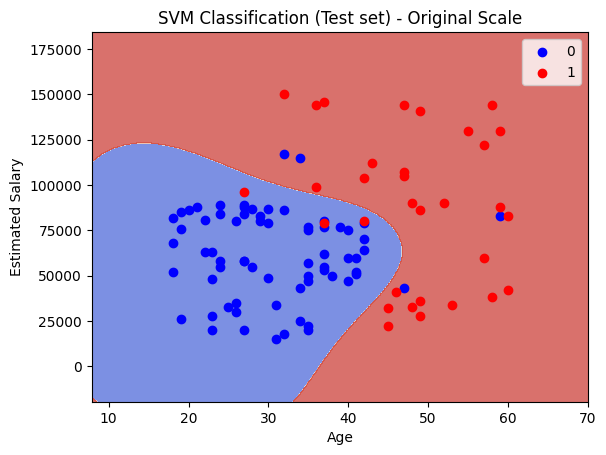

In [ ]:
# Visualize the results
# Create a meshgrid for the plot
x_min, x_max = X_Test[:, 0].min() - 1, X_Test[:, 0].max() + 1
y_min, y_max = X_Test[:, 1].min() - 1, X_Test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class labels for the meshgrid points
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Transform the meshgrid back to the original scale
xx_orig = scaler.inverse_transform(np.c_[xx.ravel(), yy.ravel()])[:, 0].reshape(xx.shape)
yy_orig = scaler.inverse_transform(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(yy.shape)

# Plot the decision boundary
plt.contourf(xx_orig, yy_orig, Z, alpha=0.75, cmap=plt.cm.coolwarm)

# Transform the test data back to the original scale for plotting
X_Test_orig = scaler.inverse_transform(X_Test)

# Plot the data points with specific colors for classes 0 and 1
colors = ['blue', 'red']
for i, j in enumerate(np.unique(Y_Test)):
    plt.scatter(X_Test_orig[Y_Test == j, 0], X_Test_orig[Y_Test == j, 1], color=colors[i], label=j)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('SVM Classification (Test set) - Original Scale')
plt.legend()
plt.show()